In [156]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [88]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv')
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [89]:
pd.get_dummies(df['WindDir9am']).sum()

E      380
ENE    433
ESE    253
N      906
NE     409
NNE    430
NNW    280
NW     625
S      402
SE     505
SSE    365
SSW    467
SW     704
W      414
WNW    480
WSW    543
dtype: int64

In [3]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [4]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [5]:
df.isnull().mean()*100

Date              0.000000
Location          0.000000
MinTemp           0.890208
MaxTemp           0.712166
Rainfall          2.848665
Evaporation      41.685460
Sunshine         47.406528
WindGustDir      11.762611
WindGustSpeed    11.762611
WindDir9am        9.839763
WindDir3pm        3.655786
WindSpeed9am      0.902077
WindSpeed3pm      1.270030
Humidity9am       0.700297
Humidity3pm       1.210682
Pressure9am      15.537092
Pressure3pm      15.572700
Cloud9am         28.735905
Cloud3pm         29.139466
Temp9am           0.664688
Temp3pm           1.139466
RainToday         2.848665
RainTomorrow      2.836795
dtype: float64

In [90]:
columns=['Evaporation','Sunshine','Cloud9am','Cloud3pm']

for cols in columns:
    random_sample_train = df[cols].dropna().sample(df[cols].isnull().sum(),random_state=18)
    random_sample_train.index = df[df[cols].isnull()].index
    df.loc[df[cols].isnull(),cols] = random_sample_train

In [91]:
df.isnull().mean()*100

Date              0.000000
Location          0.000000
MinTemp           0.890208
MaxTemp           0.712166
Rainfall          2.848665
Evaporation       0.000000
Sunshine          0.000000
WindGustDir      11.762611
WindGustSpeed    11.762611
WindDir9am        9.839763
WindDir3pm        3.655786
WindSpeed9am      0.902077
WindSpeed3pm      1.270030
Humidity9am       0.700297
Humidity3pm       1.210682
Pressure9am      15.537092
Pressure3pm      15.572700
Cloud9am          0.000000
Cloud3pm          0.000000
Temp9am           0.664688
Temp3pm           1.139466
RainToday         2.848665
RainTomorrow      2.836795
dtype: float64

In [92]:
Numeric_cols = ['MinTemp','MaxTemp','Rainfall','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm',
                'Pressure9am','Pressure3pm','Temp9am','Temp3pm']

In [93]:
from sklearn.impute import SimpleImputer

Imp = SimpleImputer(missing_values=np.nan,strategy='mean')

for cols in Numeric_cols:
    df[cols] = Imp.fit_transform(df[cols].values.reshape(-1,1))

In [94]:
category_cols = ['WindGustDir','WindDir9am','WindDir3pm','RainToday','RainTomorrow']
Cotegorical_Imp = SimpleImputer(missing_values=np.nan,strategy='most_frequent')

for columns in category_cols:
    df[columns] = Cotegorical_Imp.fit_transform(df[columns].values.reshape(-1,1))

In [95]:
df.isnull().mean()*100

Date             0.0
Location         0.0
MinTemp          0.0
MaxTemp          0.0
Rainfall         0.0
Evaporation      0.0
Sunshine         0.0
WindGustDir      0.0
WindGustSpeed    0.0
WindDir9am       0.0
WindDir3pm       0.0
WindSpeed9am     0.0
WindSpeed3pm     0.0
Humidity9am      0.0
Humidity3pm      0.0
Pressure9am      0.0
Pressure3pm      0.0
Cloud9am         0.0
Cloud3pm         0.0
Temp9am          0.0
Temp3pm          0.0
RainToday        0.0
RainTomorrow     0.0
dtype: float64

All null values are eleminated. No proceeding with exploring data in detail.

Exploring data w.r.t rainfall.

<AxesSubplot:xlabel='WindDir3pm', ylabel='Rainfall'>

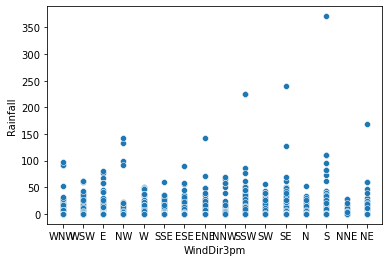

In [96]:
sns.scatterplot(x=df['WindDir3pm'], y=df['Rainfall'])

<AxesSubplot:xlabel='WindDir9am', ylabel='Rainfall'>

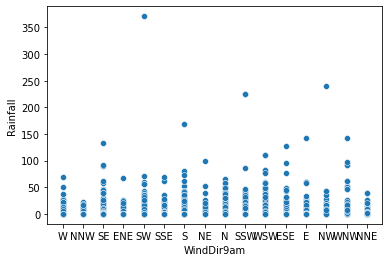

In [99]:
sns.scatterplot(x=df['WindDir9am'], y=df['Rainfall'])

<AxesSubplot:xlabel='WindGustDir', ylabel='Rainfall'>

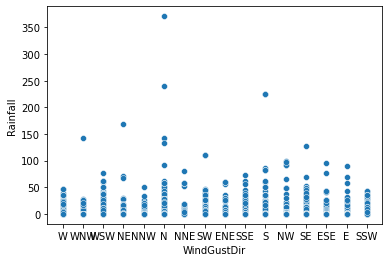

In [103]:
sns.scatterplot(x=df['WindGustDir'], y=df['Rainfall'])

Encoding categorical data

In [104]:
encoding_Le = ["Date","Location","WindGustDir","WindDir9am","WindDir3pm","RainToday","RainTomorrow"]

for items in encoding_Le:
    df[items]=le.fit_transform(df[items])

In [105]:
df.describe()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,...,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000
mean,1296.570564,5.793591,13.193305,23.859976,2.805913,5.385448,7.631276,7.217804,40.174469,7.267418,...,67.822496,51.249790,1017.640233,1015.236075,4.565935,4.498754,17.762015,22.442934,0.236202,0.236320
std,854.249434,3.162654,5.379488,6.114516,10.309308,4.954739,3.897295,4.702616,13.776101,4.588045,...,16.774231,18.311894,6.275759,6.217451,2.878879,2.734801,5.608301,5.945849,0.424773,0.424846
min,0.000000,0.000000,-2.000000,8.200000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,...,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000,0.000000,0.000000
25%,589.000000,3.000000,9.300000,19.300000,0.000000,2.600000,4.800000,3.000000,31.000000,3.000000,...,56.000000,39.000000,1014.000000,1011.400000,1.000000,2.000000,13.800000,18.100000,0.000000,0.000000
50%,1088.000000,6.000000,13.200000,23.300000,0.000000,4.600000,8.700000,7.000000,40.174469,7.000000,...,68.000000,51.000000,1017.640233,1015.236075,5.000000,5.000000,17.762015,22.000000,0.000000,0.000000
75%,2021.000000,8.000000,17.300000,28.000000,1.400000,7.000000,10.700000,12.000000,48.000000,12.000000,...,80.000000,63.000000,1021.300000,1018.800000,7.000000,7.000000,21.900000,26.300000,0.000000,0.000000
max,3003.000000,11.000000,28.500000,45.500000,371.000000,145.000000,13.900000,15.000000,107.000000,15.000000,...,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000,1.000000,1.000000


Checking Correlation

In [106]:
df.corr()['RainTomorrow'].sort_values()

Sunshine        -0.241193
Temp3pm         -0.193805
Pressure9am     -0.163985
MaxTemp         -0.152886
Pressure3pm     -0.135242
Evaporation     -0.047417
Temp9am         -0.023211
Date            -0.011228
Location         0.002824
WindDir3pm       0.008918
WindDir9am       0.032860
WindGustDir      0.051832
WindSpeed3pm     0.053568
WindSpeed9am     0.068285
MinTemp          0.092942
WindGustSpeed    0.190127
Rainfall         0.220021
Cloud9am         0.238685
Humidity9am      0.271222
Cloud3pm         0.287811
RainToday        0.312929
Humidity3pm      0.444808
RainTomorrow     1.000000
Name: RainTomorrow, dtype: float64

Observations:
1)Evaporation,Temp9am,Date,Location,WindDir3pm,WindDir9am,WindGustDir,WindSpeed3pm,WindSpeed9am,MinTemp are relatively less correlated w.r.t RainTomorrow
2)Sunshine,Temp3pm,Pressure9am,MaxTemp are ighly negatively correlated and Humidity3pm,RainToday,Cloud3pm,Humidity9am are highly positively correlated with RainTomorrow.

<AxesSubplot:xlabel='RainTomorrow', ylabel='Sunshine'>

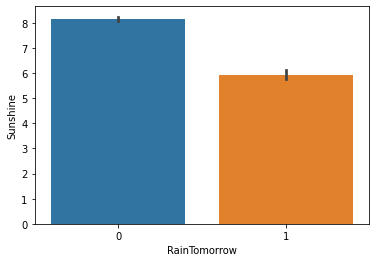

In [107]:
sns.barplot(x=df['RainTomorrow'], y=df['Sunshine'])

<AxesSubplot:xlabel='RainTomorrow', ylabel='Temp3pm'>

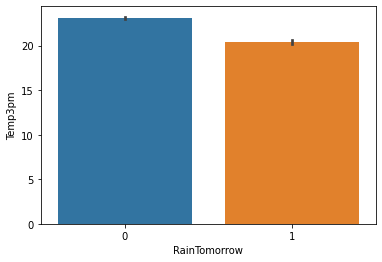

In [108]:
sns.barplot(x=df['RainTomorrow'], y=df['Temp3pm'])

<AxesSubplot:xlabel='RainTomorrow', ylabel='Pressure9am'>

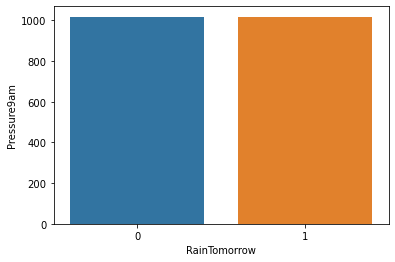

In [109]:
sns.barplot(x=df['RainTomorrow'], y=df['Pressure9am'])

<AxesSubplot:xlabel='RainTomorrow', ylabel='MaxTemp'>

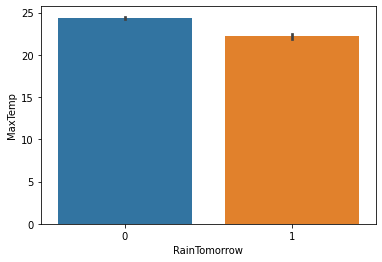

In [110]:
sns.barplot(x=df['RainTomorrow'], y=df['MaxTemp'])

<AxesSubplot:xlabel='RainTomorrow', ylabel='Humidity3pm'>

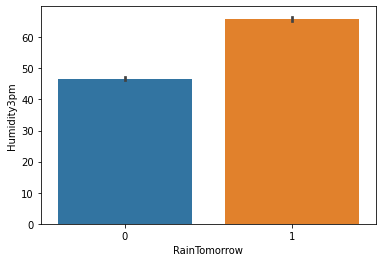

In [111]:
sns.barplot(x=df['RainTomorrow'], y=df['Humidity3pm'])

<AxesSubplot:xlabel='RainTomorrow', ylabel='RainToday'>

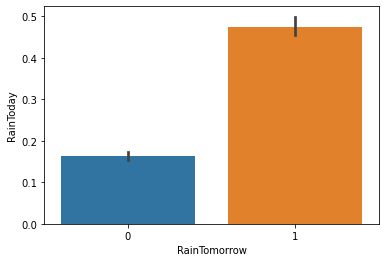

In [112]:
sns.barplot(x=df['RainTomorrow'], y=df['RainToday'])

<AxesSubplot:xlabel='RainTomorrow', ylabel='Cloud3pm'>

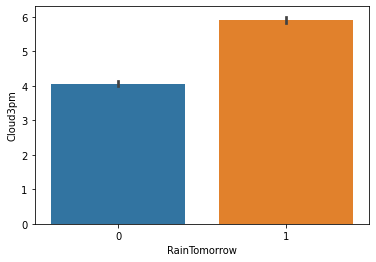

In [113]:
sns.barplot(x=df['RainTomorrow'], y=df['Cloud3pm'])

<AxesSubplot:xlabel='RainTomorrow', ylabel='Humidity9am'>

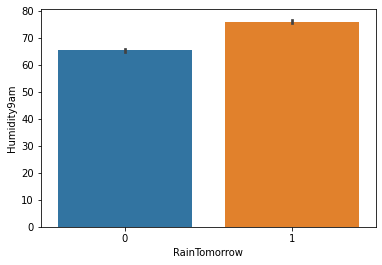

In [114]:
sns.barplot(x=df['RainTomorrow'], y=df['Humidity9am'])

<AxesSubplot:xlabel='RainTomorrow', ylabel='Rainfall'>

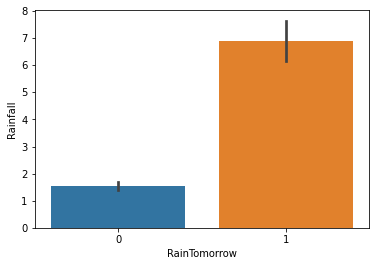

In [115]:
sns.barplot(x=df['RainTomorrow'], y=df['Rainfall'])

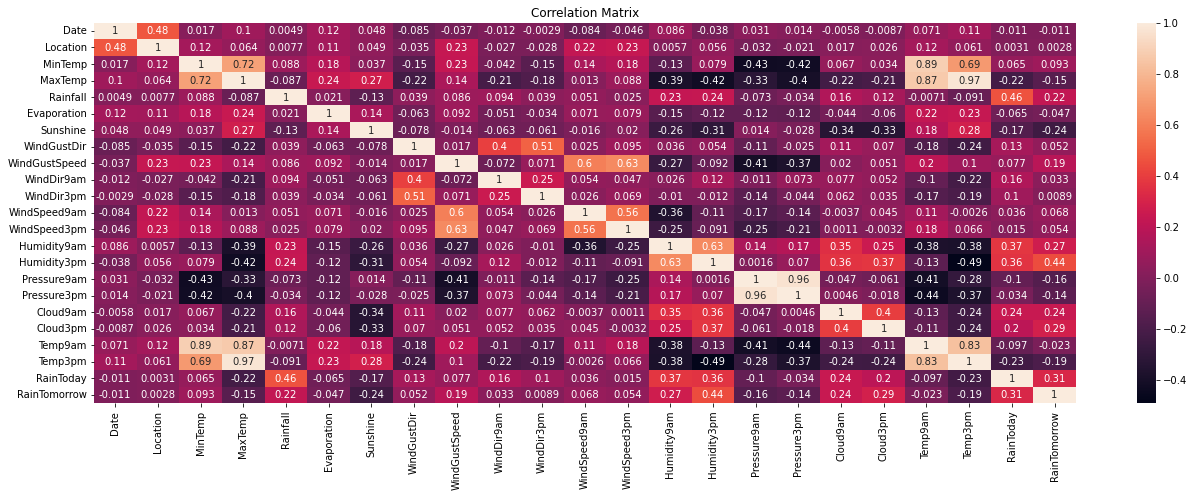

In [116]:
corr_mat = df.corr()
plt.figure(figsize=[22,7])
sns.heatmap(corr_mat,annot=True)
plt.title('Correlation Matrix')
plt.savefig('Correlation_matrix.jpg')
plt.show()

Checking multicollinearity

In [117]:
x1 = df.drop(['RainTomorrow'],axis=1)
y1 = df['RainTomorrow']

In [118]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x1)
X_scaled

array([[-1.51787928, -1.51577598,  0.03842501, ..., -0.15371247,
        -0.10813805, -0.55609919],
       [-1.5167086 , -1.51577598, -1.07698898, ..., -0.10021716,
         0.31234833, -0.55609919],
       [-1.51553791, -1.51577598, -0.05452616, ...,  0.57739016,
         0.12733432, -0.55609919],
       ...,
       [ 1.99535467,  1.01389522, -1.44879364, ..., -0.93831042,
         0.61509853, -0.55609919],
       [ 1.99652536,  1.01389522, -1.00262804, ..., -0.47468436,
         0.59827907, -0.55609919],
       [ 1.99769605,  1.01389522,  0.31727851, ..., -0.49251613,
        -0.25951315, -0.55609919]])

In [119]:
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif['Features'] = x1.columns

vif

,vif,Features
0,1.469114,Date
1,1.527073,Location
2,8.035788,MinTemp
3,26.228659,MaxTemp
4,1.309239,Rainfall
5,1.098256,Evaporation
6,1.285640,Sunshine
7,1.595568,WindGustDir
8,2.408453,WindGustSpeed
9,1.344380,WindDir9am


Checking Skewness

In [120]:
df.skew()

Date              0.386560
Location         -0.050456
MinTemp          -0.089989
MaxTemp           0.380654
Rainfall         13.218403
Evaporation      10.153051
Sunshine         -0.519838
WindGustDir       0.119640
WindGustSpeed     0.757000
WindDir9am        0.172792
WindDir3pm       -0.119847
WindSpeed9am      0.960591
WindSpeed3pm      0.494217
Humidity9am      -0.256743
Humidity3pm       0.118281
Pressure9am      -0.024082
Pressure3pm      -0.010214
Cloud9am         -0.309421
Cloud3pm         -0.233422
Temp9am          -0.014748
Temp3pm           0.397331
RainToday         1.242362
RainTomorrow      1.241588
dtype: float64

In [121]:
columns = ('Rainfall','Evaporation','WindGustSpeed','WindSpeed9am','RainToday')
for col in columns:
    if df.skew().loc[col]>0.55:
        df[col] = np.log1p(df[col])

In [122]:
df.skew()

Date             0.386560
Location        -0.050456
MinTemp         -0.089989
MaxTemp          0.380654
Rainfall         1.810210
Evaporation      0.031444
Sunshine        -0.519838
WindGustDir      0.119640
WindGustSpeed   -0.400577
WindDir9am       0.172792
WindDir3pm      -0.119847
WindSpeed9am    -1.165210
WindSpeed3pm     0.494217
Humidity9am     -0.256743
Humidity3pm      0.118281
Pressure9am     -0.024082
Pressure3pm     -0.010214
Cloud9am        -0.309421
Cloud3pm        -0.233422
Temp9am         -0.014748
Temp3pm          0.397331
RainToday        1.242362
RainTomorrow     1.241588
dtype: float64

Skewness is reduced and lies between range -0.01 to 1.81.

Checking outliers

Date                AxesSubplot(0.125,0.787927;0.168478x0.0920732)
Location         AxesSubplot(0.327174,0.787927;0.168478x0.0920732)
MinTemp          AxesSubplot(0.529348,0.787927;0.168478x0.0920732)
MaxTemp          AxesSubplot(0.731522,0.787927;0.168478x0.0920732)
Rainfall            AxesSubplot(0.125,0.677439;0.168478x0.0920732)
Evaporation      AxesSubplot(0.327174,0.677439;0.168478x0.0920732)
Sunshine         AxesSubplot(0.529348,0.677439;0.168478x0.0920732)
WindGustDir      AxesSubplot(0.731522,0.677439;0.168478x0.0920732)
WindGustSpeed       AxesSubplot(0.125,0.566951;0.168478x0.0920732)
WindDir9am       AxesSubplot(0.327174,0.566951;0.168478x0.0920732)
WindDir3pm       AxesSubplot(0.529348,0.566951;0.168478x0.0920732)
WindSpeed9am     AxesSubplot(0.731522,0.566951;0.168478x0.0920732)
WindSpeed3pm        AxesSubplot(0.125,0.456463;0.168478x0.0920732)
Humidity9am      AxesSubplot(0.327174,0.456463;0.168478x0.0920732)
Humidity3pm      AxesSubplot(0.529348,0.456463;0.168478x0.0920

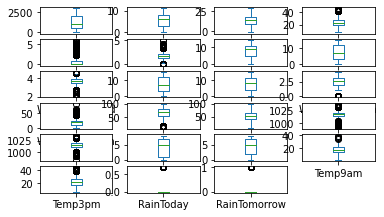

In [123]:
df.plot(kind='box',subplots=True,layout=(7,4))

There are outliers present in few columns.

In [124]:
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([  12,   12,   44,   44,   52,   60,   60,   61,   61,   62,   62,
          67,   68,   68,   98,  187,  199,  296,  381,  405,  406,  407,
         407,  431,  462,  542,  559,  561,  568,  568,  569,  579,  579,
         602,  683,  683,  684,  699,  713,  748,  748,  770,  796,  797,
         802,  879,  893,  928,  935,  949,  979,  980, 1008, 1009, 1011,
        1138, 1148, 1149, 1151, 1189, 1202, 1203, 1237, 1241, 1264, 1265,
        1357, 1358, 1411, 1412, 1413, 1479, 1480, 1481, 1513, 1514, 1587,
        1644, 1661, 1665, 1673, 1680, 1774, 1782, 1819, 1873, 1898, 1954,
        2028, 2043, 2063, 2108, 2116, 2182, 2183, 2201, 2211, 2219, 2230,
        2231, 2265, 2346, 2355, 2362, 2373, 2389, 2429, 2488, 2527, 2527,
        2541, 2593, 2672, 2676, 2677, 2693, 2702, 2709, 2710, 2713, 2735,
        2737, 2738, 2739, 2743, 2744, 2746, 2750, 2768, 2769, 2849, 2859,
        2877, 2890, 2898, 2900, 2901, 2909, 3003, 3051, 3051, 3058, 3059,
        3059, 3060, 3067, 3082, 3099, 

In [125]:
df = df[(z<3).all(axis=1)]
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0,1,13.4,22.900000,0.470004,1.435085,9.4,13,3.806662,13,...,71.0,22.0,1007.7,1007.1,8.0,0.0,16.9,21.8,0.0,0
1,1,1,7.4,25.100000,0.000000,1.335001,7.1,14,3.806662,6,...,44.0,25.0,1010.6,1007.8,1.0,5.0,17.2,24.3,0.0,0
2,2,1,12.9,25.700000,0.000000,1.335001,4.3,15,3.850148,13,...,38.0,30.0,1007.6,1008.7,7.0,2.0,21.0,23.2,0.0,0
3,3,1,9.2,28.000000,0.000000,1.223775,9.1,4,3.218876,9,...,45.0,16.0,1017.6,1012.8,7.0,3.0,18.1,26.5,0.0,0
4,4,1,17.5,32.300000,0.693147,1.791759,8.4,13,3.737670,1,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2999,9,2.8,23.400000,0.000000,2.197225,13.1,0,3.465736,9,...,51.0,24.0,1024.6,1020.3,1.0,1.0,10.1,22.4,0.0,0
8421,3000,9,3.6,25.300000,0.000000,1.481605,7.5,6,3.135494,9,...,56.0,21.0,1023.5,1019.1,1.0,8.0,10.9,24.5,0.0,0
8422,3001,9,5.4,26.900000,0.000000,0.470004,11.3,3,3.637586,9,...,53.0,24.0,1021.0,1016.8,0.0,1.0,12.5,26.1,0.0,0
8423,3002,9,7.8,27.000000,0.000000,1.887070,10.9,9,3.367296,10,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,0.0,0


In [126]:
df.shape

(8094, 23)

%Percentage data loss

In [127]:
Data_loss=((8425-8094)/8425)*100
Data_loss

3.9287833827893173

In [128]:
pd.get_dummies(df['RainTomorrow']).sum()

0    6249
1    1845
dtype: int64

Target column is imbalanced and we will use SMOTE to balance it.

!pip install -U imbalanced.learn

In [129]:
from imblearn.over_sampling import SMOTE
smt = SMOTE()
trainx,trainy=smt.fit_resample(x1,y1)

In [130]:
trainx.value_counts()

Date  Location  MinTemp    MaxTemp    Rainfall   Evaporation  Sunshine   WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am    Temp3pm    RainToday
318   5         10.800000  16.300000  1.800000   2.200000     2.500000   12           81.000000      3           12          17.000000     41.000000     72.000000    71.000000    1005.200000  1007.000000  7.000000  6.000000  12.800000  13.900000  1            7
936   5         9.100000   14.000000  4.800000   1.200000     1.500000   12           39.000000      3           15          11.000000     19.000000     91.000000    78.000000    1015.700000  1015.100000  8.000000  6.000000  10.300000  13.200000  1            6
2543  10        15.500000  23.800000  1.200000   4.200000     7.500000   11           50.000000      13          9           19.000000     26.000000     83.000000    67.000000    1017.200000  1014.900000  7.000000  4.00

In [131]:
trainy.value_counts()

0    6434
1    6434
Name: RainTomorrow, dtype: int64

Predicting RainfallTomorrow using classification approach

In [132]:
model = [DecisionTreeClassifier(),SVC(),RandomForestClassifier(),KNeighborsClassifier(),LogisticRegression()]

for i in range(0,50):
    x_train,x_test,y_train,y_test = train_test_split(trainx,trainy,test_size=0.33,random_state=i)
    for models in model:
        models.fit(x_train,y_train)
        prediction = models.predict(x_test)
        accu_Score = accuracy_score(y_test,prediction)
        print("Accuracy score for random state: ", i, " is ",accu_Score)
print()
print()
print()
print()
print()

Accuracy score for random state:  0  is  0.8389451377442901
Accuracy score for random state:  0  is  0.7417000235460325
Accuracy score for random state:  0  is  0.9201789498469508
Accuracy score for random state:  0  is  0.8712032022604191
Accuracy score for random state:  0  is  0.767836119613845
Accuracy score for random state:  1  is  0.8566046621144338
Accuracy score for random state:  1  is  0.7233341182010831
Accuracy score for random state:  1  is  0.9149988226983753
Accuracy score for random state:  1  is  0.8629620908876854
Accuracy score for random state:  1  is  0.7706616435130681
Accuracy score for random state:  2  is  0.8398869790440311
Accuracy score for random state:  2  is  0.737461737697198
Accuracy score for random state:  2  is  0.91476336237344
Accuracy score for random state:  2  is  0.8570755827643042
Accuracy score for random state:  2  is  0.7701907228631976
Accuracy score for random state:  3  is  0.8467153284671532
Accuracy score for random state:  3  is  0.7

Highest accuracy Score:0.922298092771368 is at random state 24 and for model: RandomForestClassifier.

Parameter Tunning

In [133]:
x1_train,x1_test,y1_train,y1_test = train_test_split(trainx,trainy,test_size=0.33,random_state=24)
rfc = RandomForestClassifier()
parameters={'max_features': ['auto','sqrt','log2']}
gridsearch =GridSearchCV(rfc,parameters)
gridsearch.fit(x_train,y_train)
gridsearch.best_params_

{'max_features': 'auto'}

In [134]:
Rfc = RandomForestClassifier(max_features='auto')
Rfc.fit(x_train,y_train)
predictions = Rfc.predict(x_test)
AccScore = accuracy_score(y_test,predictions)
print("Accuracy Score is: ",AccScore)

Accuracy Score is:  0.9164115846479868


In [135]:
score = cross_val_score(Rfc,x1,y1,cv=5)

In [136]:
print("Croos Val Score: ",score)
print("Mean Score: ",score.mean())
print("std Score: ",score.std())

Croos Val Score:  [0.84569733 0.84451039 0.8652819  0.83026706 0.84569733]
Mean Score:  0.8462908011869438
std Score:  0.011147163804746714


0.9164107483901985

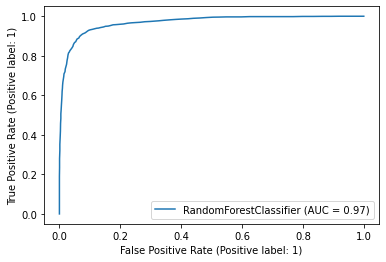

In [137]:
from sklearn import metrics
metrics.plot_roc_curve(Rfc, x_test, y_test)
metrics.roc_auc_score(y_test, predictions, average=None)

In [162]:
lg = LogisticRegression()
lg.fit(trainx,trainy)

LogisticRegression()

In [139]:
y_pred2 = lg.predict(x_test)
print(confusion_matrix(y_test,y_pred2))
print(accuracy_score(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

[[1662  462]
 [ 524 1599]]
0.767836119613845
              precision    recall  f1-score   support

           0       0.76      0.78      0.77      2124
           1       0.78      0.75      0.76      2123

    accuracy                           0.77      4247
   macro avg       0.77      0.77      0.77      4247
weighted avg       0.77      0.77      0.77      4247



0.7678326693651186

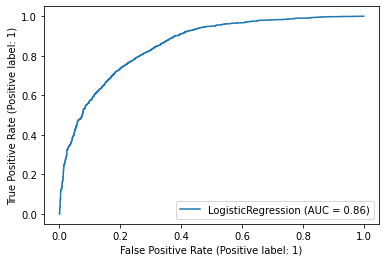

In [140]:
metrics.plot_roc_curve(lg, x_test, y_test)
metrics.roc_auc_score(y_test, y_pred2, average=None) 

In [163]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(trainx,trainy)

KNeighborsClassifier(n_neighbors=3)

In [142]:
y_pred3 = knn.predict(x_test)
print(confusion_matrix(y_test,y_pred3))
print(accuracy_score(y_test,y_pred3))
print(classification_report(y_test,y_pred3))

[[1972  152]
 [  16 2107]]
0.9604426654108783
              precision    recall  f1-score   support

           0       0.99      0.93      0.96      2124
           1       0.93      0.99      0.96      2123

    accuracy                           0.96      4247
   macro avg       0.96      0.96      0.96      4247
weighted avg       0.96      0.96      0.96      4247



0.9604502032709639

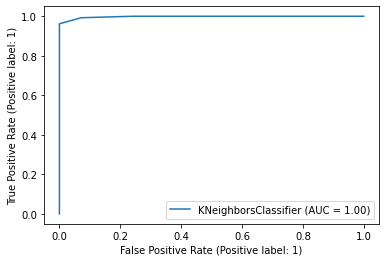

In [143]:
metrics.plot_roc_curve(knn, x_test, y_test)
metrics.roc_auc_score(y_test, y_pred3, average=None) 

predicting rainfall using regression approach.

EDA

In [144]:
df.corr()['Rainfall'].sort_values()

Temp3pm         -0.217035
MaxTemp         -0.207263
Sunshine        -0.167821
Evaporation     -0.120975
Pressure9am     -0.119601
Temp9am         -0.084526
Pressure3pm     -0.043095
Date             0.013224
Location         0.024081
WindSpeed3pm     0.037571
WindSpeed9am     0.043021
MinTemp          0.081389
WindGustSpeed    0.093759
WindDir3pm       0.104676
WindGustDir      0.127906
WindDir9am       0.149778
Cloud3pm         0.196882
Cloud9am         0.240134
RainTomorrow     0.312877
Humidity3pm      0.350448
Humidity9am      0.378915
RainToday        0.870450
Rainfall         1.000000
Name: Rainfall, dtype: float64

Observation:
1)Pressure3pm,Temp9am,Date,Location,WindSpeed3pm,WindSpeed9am,MinTemp,WindGustSpeed are relatively less correlated w.r.t Rainfall.
2)Sunshine,Temp3pm,Pressure9am,MaxTemp,Evaporation are highly negatively correlated and Humidity3pm,RainToday,Cloud9am,Humidity9am,RainTomorrow are highly positively correlated with Rainfall.

<AxesSubplot:xlabel='Rainfall', ylabel='Sunshine'>

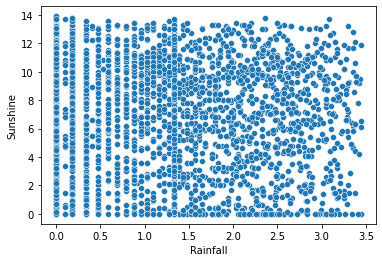

In [145]:
sns.scatterplot(x=df['Rainfall'], y=df['Sunshine'])

<AxesSubplot:xlabel='Rainfall', ylabel='Temp3pm'>

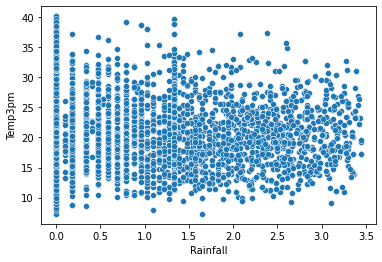

In [146]:
sns.scatterplot(x=df['Rainfall'], y=df['Temp3pm'])

<AxesSubplot:xlabel='Evaporation', ylabel='Rainfall'>

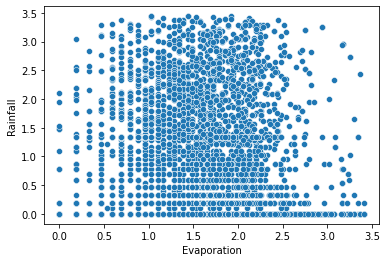

In [147]:
sns.scatterplot(x=df['Evaporation'], y=df['Rainfall'])

<AxesSubplot:xlabel='Humidity3pm', ylabel='Rainfall'>

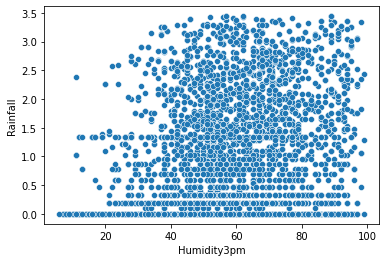

In [148]:
sns.scatterplot(x=df['Humidity3pm'], y=df['Rainfall'])

<AxesSubplot:xlabel='Humidity9am', ylabel='Rainfall'>

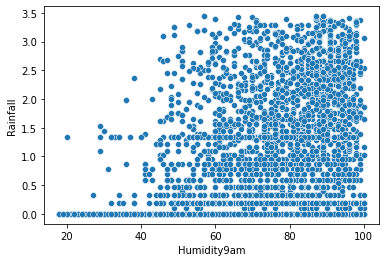

In [149]:
sns.scatterplot(x=df['Humidity9am'], y=df['Rainfall'])

<AxesSubplot:xlabel='Cloud9am', ylabel='Rainfall'>

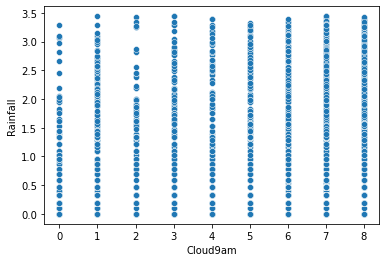

In [150]:
sns.scatterplot(x=df['Cloud9am'], y=df['Rainfall'])

<AxesSubplot:xlabel='Cloud3pm', ylabel='Rainfall'>

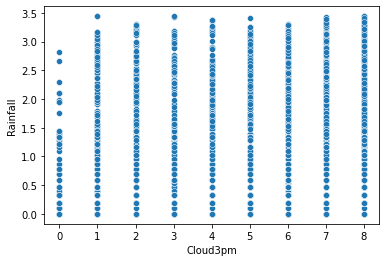

In [151]:
sns.scatterplot(x=df['Cloud3pm'], y=df['Rainfall'])

Observations:
1) Rainfall is higher if cloud cover has value more than 3.
2) Higher the HUmidity higher rainfall can be observed.

In [152]:
x = df.drop(['Rainfall'],axis=1)
y = df['Rainfall']

In [153]:
x.shape

(8094, 22)

In [154]:
y.shape

(8094,)

In [157]:
model = [DecisionTreeRegressor(),KNeighborsRegressor(),LinearRegression(),SVR()]

for i in range(0,50):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=i)
    for models in model:
        models.fit(x_train,y_train)
        prediction = models.predict(x_test)
        R2Score = r2_score(y_test,prediction)
        print("R2 score for random state: ", i, " is ",R2Score)
print()
print()
print()
print()

R2 score for random state:  0  is  0.6915859398796844
R2 score for random state:  0  is  0.23533574808571134
R2 score for random state:  0  is  0.7638109572409391
R2 score for random state:  0  is  -0.1251628254253625
R2 score for random state:  1  is  0.6694638923570883
R2 score for random state:  1  is  0.23514942334672384
R2 score for random state:  1  is  0.7689743838074385
R2 score for random state:  1  is  -0.13390339144906416
R2 score for random state:  2  is  0.696434113684598
R2 score for random state:  2  is  0.23974263108598237
R2 score for random state:  2  is  0.7746144354778648
R2 score for random state:  2  is  -0.1286818183958316
R2 score for random state:  3  is  0.6797676830105619
R2 score for random state:  3  is  0.26892168982722
R2 score for random state:  3  is  0.771821466668023
R2 score for random state:  3  is  -0.14943511739621185
R2 score for random state:  4  is  0.6750427840712243
R2 score for random state:  4  is  0.22969705459012646
R2 score for random st

Highest R2 Score:0.7868617405279529 is at random state 27 and for model: LinearRegression.

Best Parameter

In [161]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print("Mean Absolute Error: ", mean_absolute_error(y_test,prediction))
print("Mean Squared Error: ",mean_squared_error(y_test,prediction))
print("Root Mean Squared Error: ",np.sqrt(mean_squared_error(y_test,prediction)))

Mean Absolute Error:  0.5293501259696465
Mean Squared Error:  0.8743749323037343
Root Mean Squared Error:  0.9350801742651452
